In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
loan_data = pd.read_csv('loan.csv',low_memory=False)

In [3]:
# Drop columns with more than 50% missing values
threshold = 0.5 * len(loan_data)
loan_data.dropna(thresh=threshold, axis=1, inplace=True)

In [4]:
# Calculate the proportion of missing values for each column
missing_proportion = (loan_data.isnull().sum() / len(loan_data)) * 100

In [5]:
# Display the proportion of missing values for each column
print("\nProportion of Missing Values (before handling):")
print(missing_proportion[missing_proportion > 0])


Proportion of Missing Values (before handling):
emp_title                      6.191303
emp_length                     2.706650
desc                          32.585543
title                          0.027696
revol_util                     0.125891
last_pymnt_d                   0.178765
last_credit_pull_d             0.005036
collections_12_mths_ex_med     0.140998
chargeoff_within_12_mths       0.140998
pub_rec_bankruptcies           1.754916
tax_liens                      0.098195
dtype: float64


Impute missing values

In [6]:
# High Missing Values
loan_data['desc'].fillna('No Description', inplace=True)

In [7]:
# Moderate Missing Values: Drop rows with missing values
loan_data.dropna(subset=['emp_title', 'emp_length', 'pub_rec_bankruptcies'], inplace=True)

In [8]:
# Low Missing Values
loan_data['title'].fillna('Unknown', inplace=True)
loan_data['last_pymnt_d'].fillna(loan_data['last_pymnt_d'].mode()[0], inplace=True)
loan_data['last_credit_pull_d'].fillna(loan_data['last_credit_pull_d'].mode()[0], inplace=True)
loan_data['collections_12_mths_ex_med'].fillna(loan_data['collections_12_mths_ex_med'].median(), inplace=True)
loan_data['chargeoff_within_12_mths'].fillna(loan_data['chargeoff_within_12_mths'].median(), inplace=True)
loan_data['tax_liens'].fillna(loan_data['tax_liens'].median(), inplace=True)

In [9]:
revol_util_med = str(loan_data['revol_util'].str.rstrip('%').astype(float).median())+'%'
loan_data['revol_util'].fillna(revol_util_med, inplace=True)

In [10]:
# Check remaining missing values
remaining_missing_values = loan_data.isnull().sum()

In [11]:
print("\nRemaining Missing Values (after handling):")
print(remaining_missing_values[remaining_missing_values > 0])


Remaining Missing Values (after handling):
Series([], dtype: int64)


In [12]:
loan_data['grade_num'] = pd.factorize(loan_data['grade'])[0] + 1
loan_data['purpose_num'] = pd.factorize(loan_data['purpose'])[0] + 1
loan_data['home_ownership_num'] = pd.factorize(loan_data['home_ownership'])[0] + 1
loan_data['verification_status_num'] = pd.factorize(loan_data['verification_status'])[0] + 1

In [13]:
# Save the cleaned data for further analysis or modeling
loan_data.to_csv('cleaned_loan_data.csv', index=False)

In [14]:
print("\nData cleaning completed and saved as 'cleaned_loan_data.csv'.")


Data cleaning completed and saved as 'cleaned_loan_data.csv'.


In [15]:
# Summary statistics
print("\nSummary Statistics:")
print(loan_data.describe())


Summary Statistics:
                 id     member_id     loan_amnt   funded_amnt  \
count  3.654800e+04  3.654800e+04  36548.000000  36548.000000   
mean   6.907171e+05  8.607228e+05  11294.866340  11020.644769   
std    2.026869e+05  2.539809e+05   7435.395805   7168.173439   
min    5.574200e+04  1.124930e+05    500.000000    500.000000   
25%    5.224358e+05  6.752048e+05   5600.000000   5500.000000   
50%    6.702785e+05  8.567205e+05  10000.000000  10000.000000   
75%    8.397425e+05  1.049490e+06  15000.000000  15000.000000   
max    1.077430e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     36548.000000  36548.000000  3.654800e+04  36548.000000   
mean      10586.433390    325.860813  6.923504e+04     13.437434   
std        7073.216233    207.420129  6.350343e+04      6.645522   
min           0.000000     16.080000  4.000000e+03      0.000000   
25%        5000.000000    168.730000  4.189800e+04   

Creating new data frame for correlation matrix:

In [16]:
#creating correlation matrix for multivariate analysis
correlation_matrix = loan_data.copy()

In [17]:
# Convert target variable to binary (1: charged off, 0: others)
correlation_matrix['loan_status'] = correlation_matrix['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)

In [18]:

# Clean columns to transfer into numeric values
correlation_matrix['revol_util'] = correlation_matrix['revol_util'].str.rstrip('%').astype(float)
correlation_matrix['int_rate'] = correlation_matrix['int_rate'].str.rstrip('%').astype(float)
correlation_matrix['term'] = correlation_matrix['term'].str.replace('months','').astype(int)
correlation_matrix =  correlation_matrix[correlation_matrix.select_dtypes(include=['int64', 'float64']).columns]


In [19]:
#Checking all values are proper imputed
correlation_matrix.isnull().sum().sort_values(ascending=False)

id                            0
policy_code                   0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pymnt_amnt               0
collections_12_mths_ex_med    0
acc_now_delinq                0
member_id                     0
chargeoff_within_12_mths      0
delinq_amnt                   0
pub_rec_bankruptcies          0
tax_liens                     0
grade_num                     0
purpose_num                   0
home_ownership_num            0
total_pymnt_inv               0
total_pymnt                   0
out_prncp_inv                 0
out_prncp                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
int_rate                      0
installment                   0
annual_inc                    0
loan_status                   0
dti                           0
delinq_2yrs                   0
inq_last

In [20]:
#Creating heatmap for Correlation matrix for data created
column_drop = ['collections_12_mths_ex_med','policy_code','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens']
correlation_matrix= correlation_matrix.drop(columns=column_drop)
correlation_matrix = correlation_matrix.corr()
print("correlation_matrix",correlation_matrix)

correlation_matrix                                id  member_id  loan_amnt  funded_amnt  \
id                       1.000000   0.993310   0.145481     0.157376   
member_id                0.993310   1.000000   0.145321     0.156573   
loan_amnt                0.145481   0.145321   1.000000     0.981436   
funded_amnt              0.157376   0.156573   0.981436     1.000000   
funded_amnt_inv          0.221256   0.228849   0.952978     0.972443   
int_rate                 0.071353   0.066531   0.306301     0.310580   
installment              0.093654   0.088900   0.929061     0.955070   
annual_inc               0.012309   0.013350   0.261622     0.257500   
loan_status              0.034860   0.032940   0.049908     0.047155   
dti                      0.084078   0.084944   0.067897     0.068341   
delinq_2yrs             -0.005106  -0.004304  -0.035116    -0.035906   
inq_last_6mths          -0.038738  -0.043531   0.007250     0.007604   
open_acc                 0.025055   0.022574 

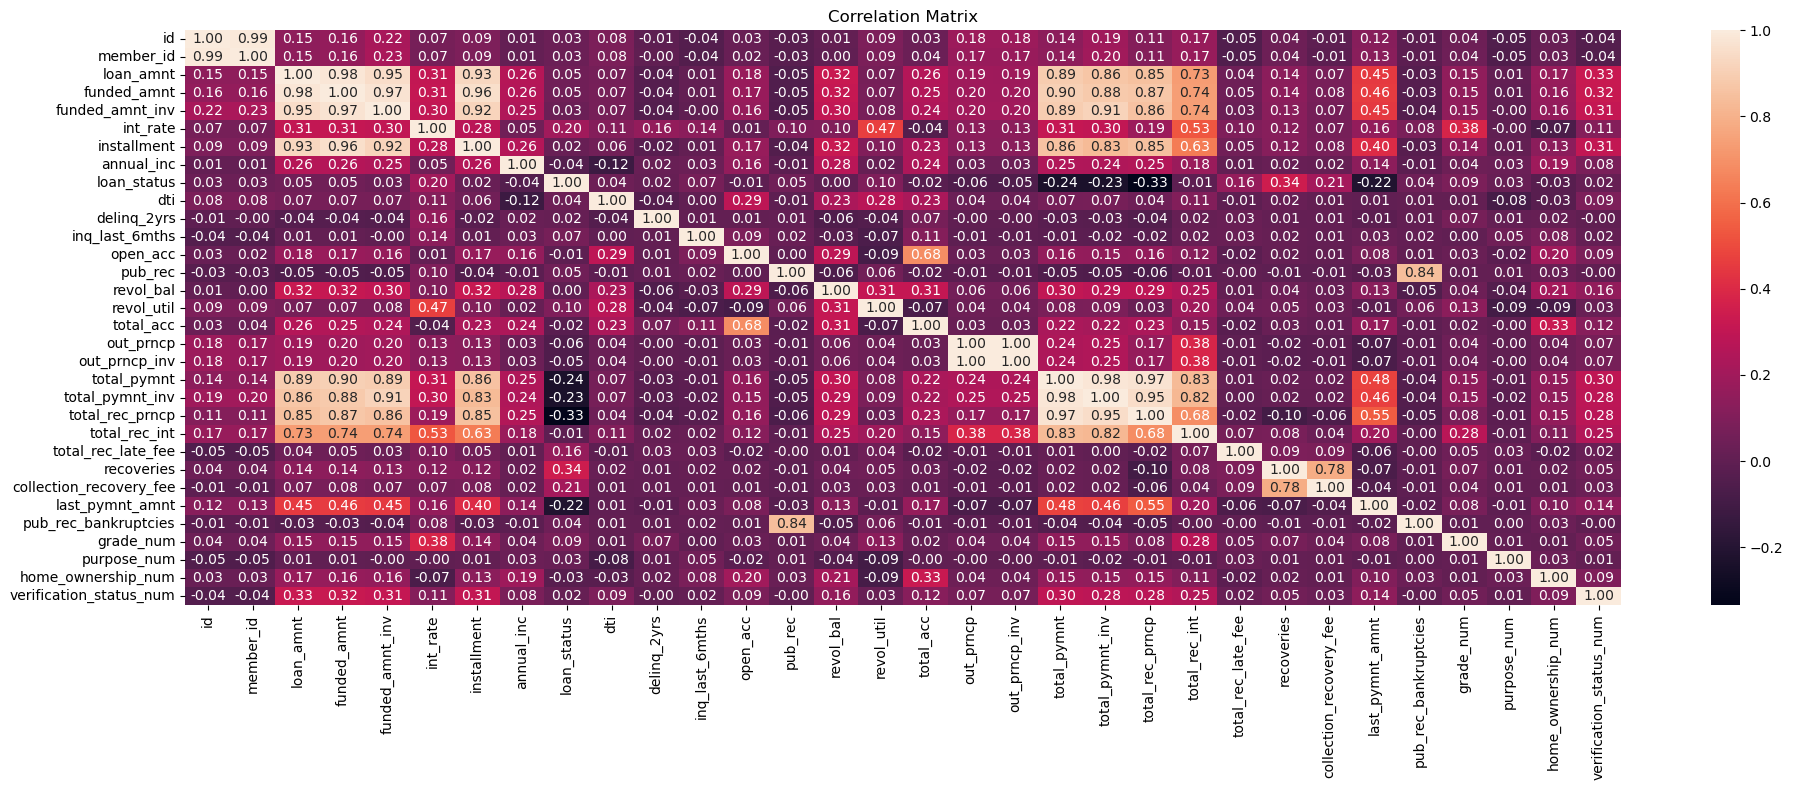

In [21]:

plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

Selected columns based on Heatmap output.

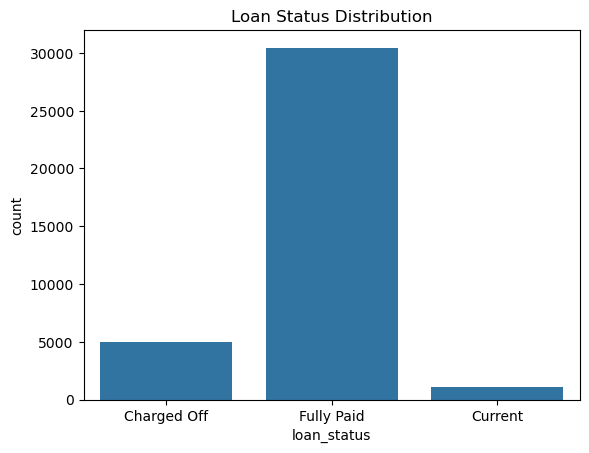

In [22]:
# Visualize distribution of target variable univariate analysis
sns.countplot(x='loan_status', data=loan_data)
plt.title('Loan Status Distribution')
plt.show()

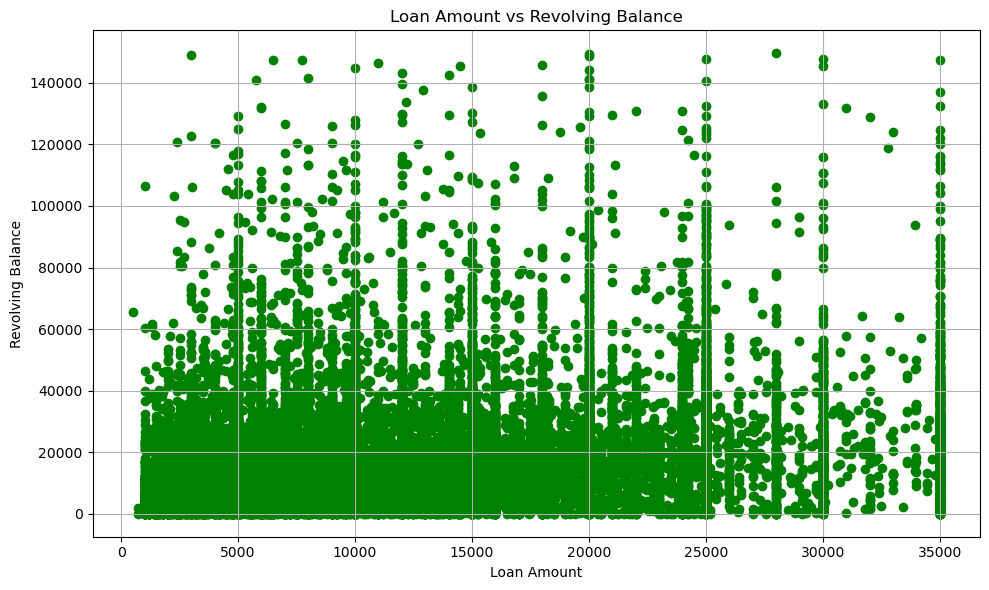

In [23]:
# Plotting loan_amt against revol_bal to check approval 
plt.figure(figsize=(10, 6))
plt.scatter(loan_data['loan_amnt'], loan_data['revol_bal'], marker='o', linestyle='-', color='g')

# Add labels and title
plt.xlabel('Loan Amount')
plt.ylabel('Revolving Balance')
plt.title('Loan Amount vs Revolving Balance')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

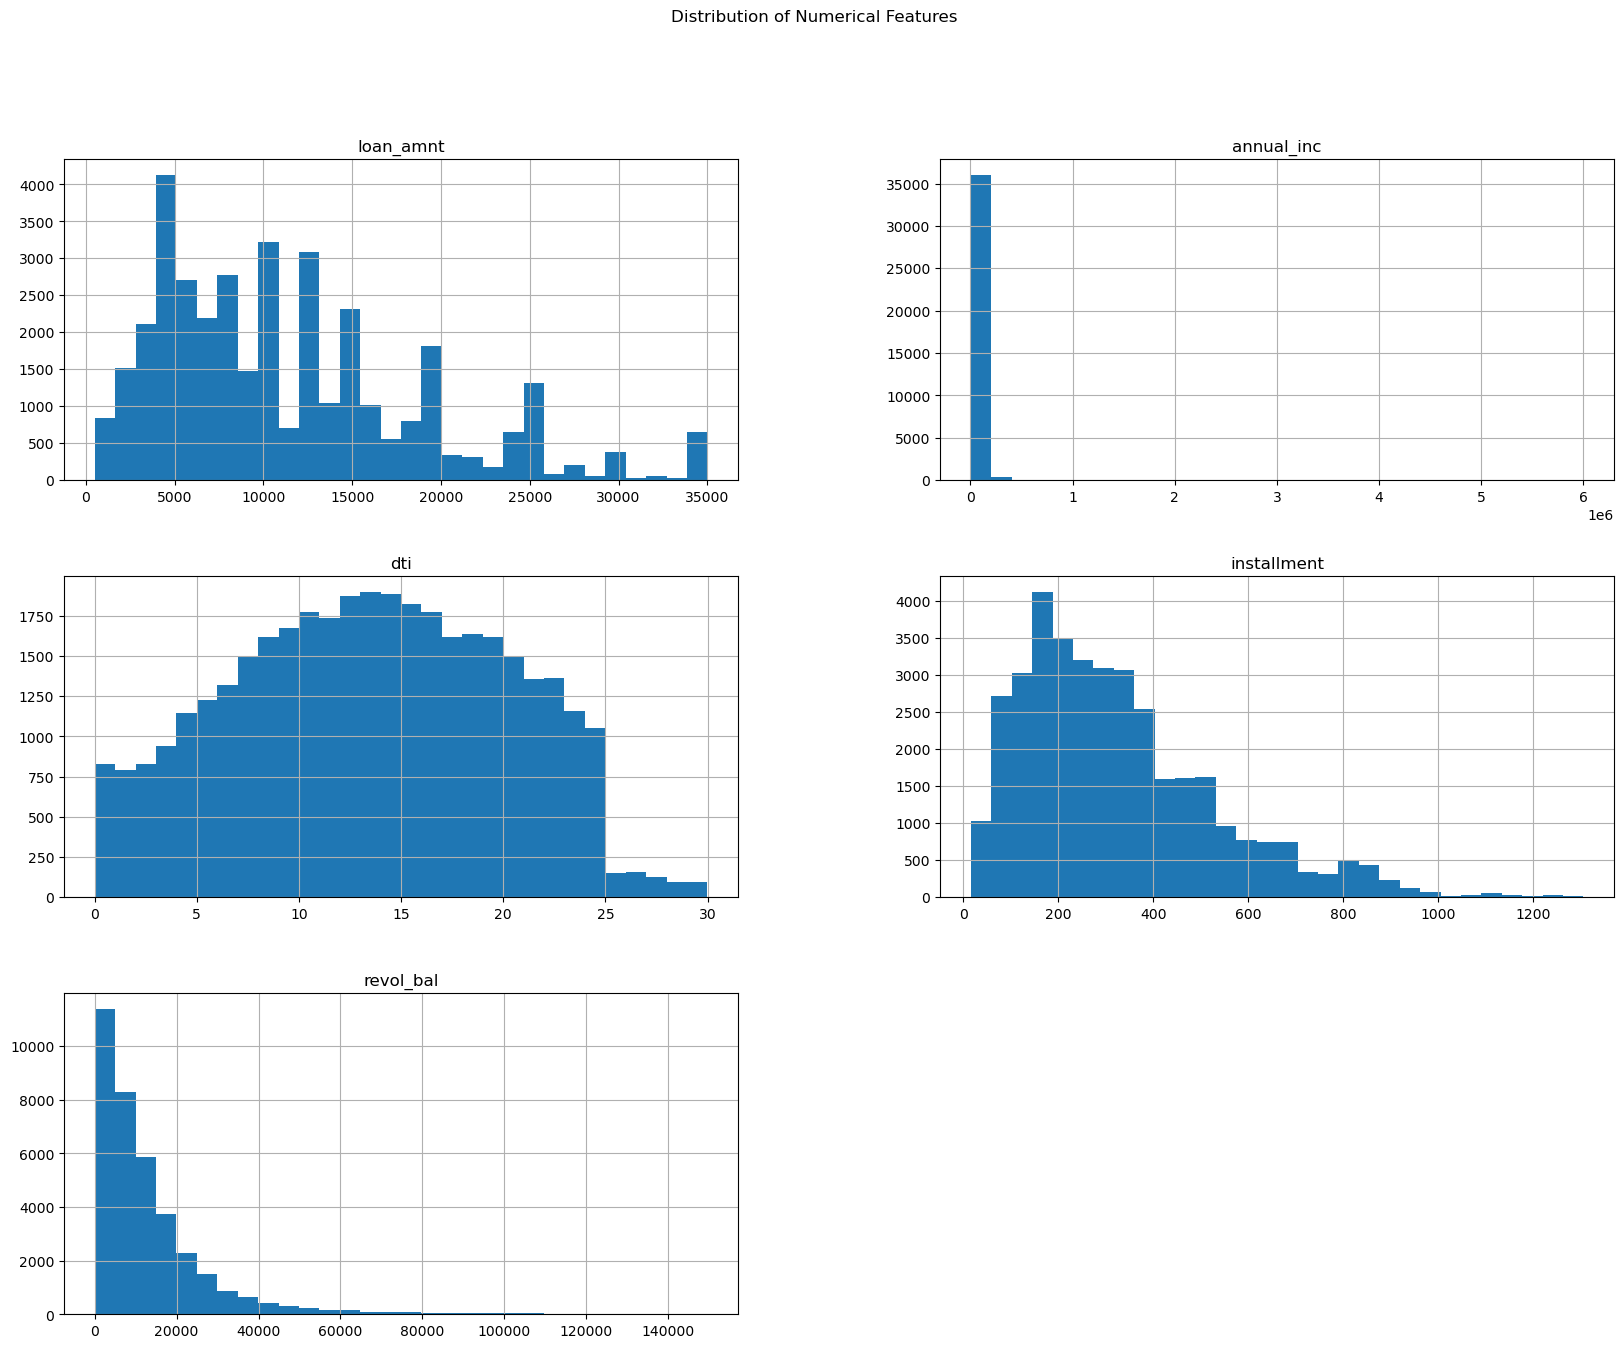

In [24]:
# Visualize key numerical features
numerical_features = ['loan_amnt', 'annual_inc', 'dti', 'installment','revol_bal']
plt.figure(figsize=(10, 6))
loan_data[numerical_features].hist(bins=30, figsize=(20, 15), layout=(3, 2))
plt.suptitle('Distribution of Numerical Features')
plt.show()

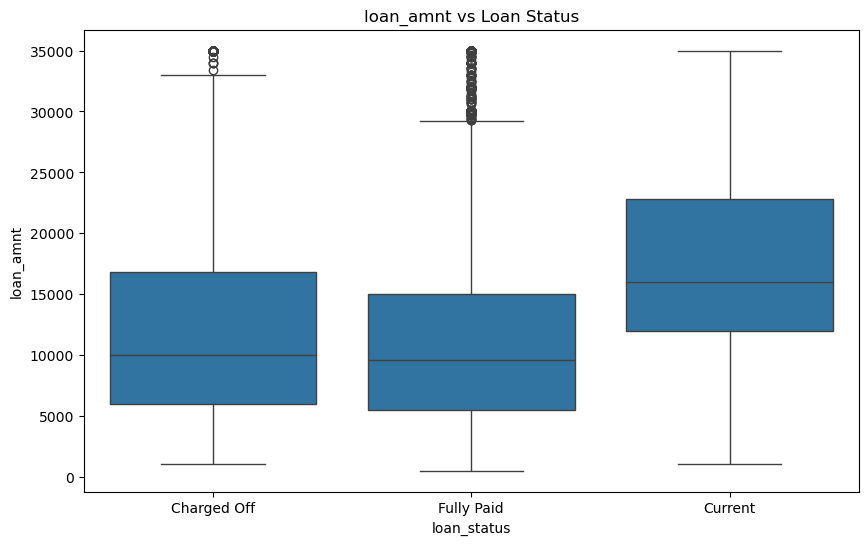

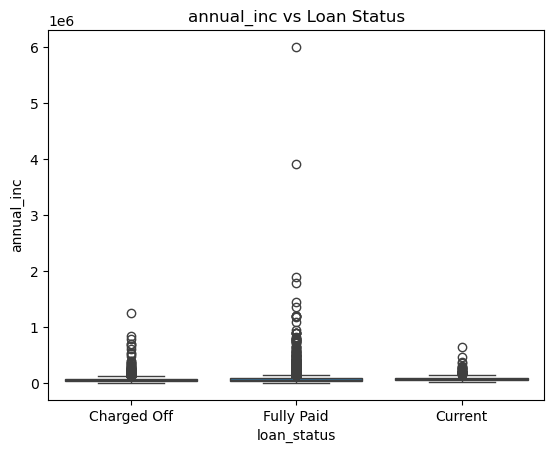

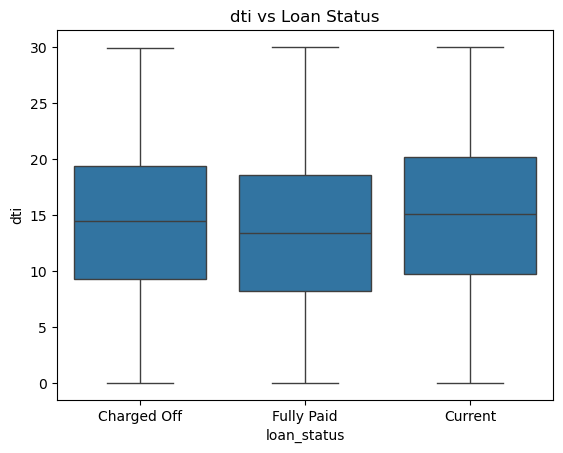

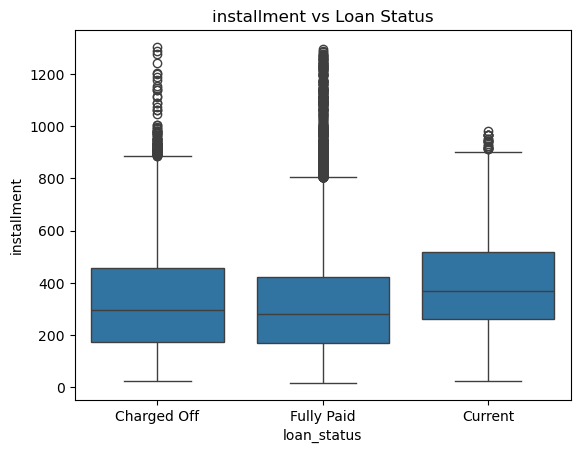

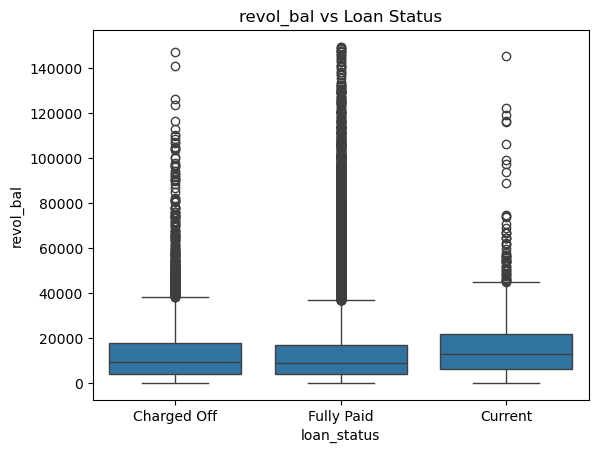

In [25]:
# Analyze relationship between numerical features and target variable
plt.figure(figsize=(10, 6))
for feature in numerical_features:
    sns.boxplot(x='loan_status', y=feature, data=loan_data)
    plt.title(f'{feature} vs Loan Status')
    plt.show()

In [26]:
# Analyze categorical features
categorical_features = ['grade', 'sub_grade', 'home_ownership', 'purpose', 'verification_status', 'term']

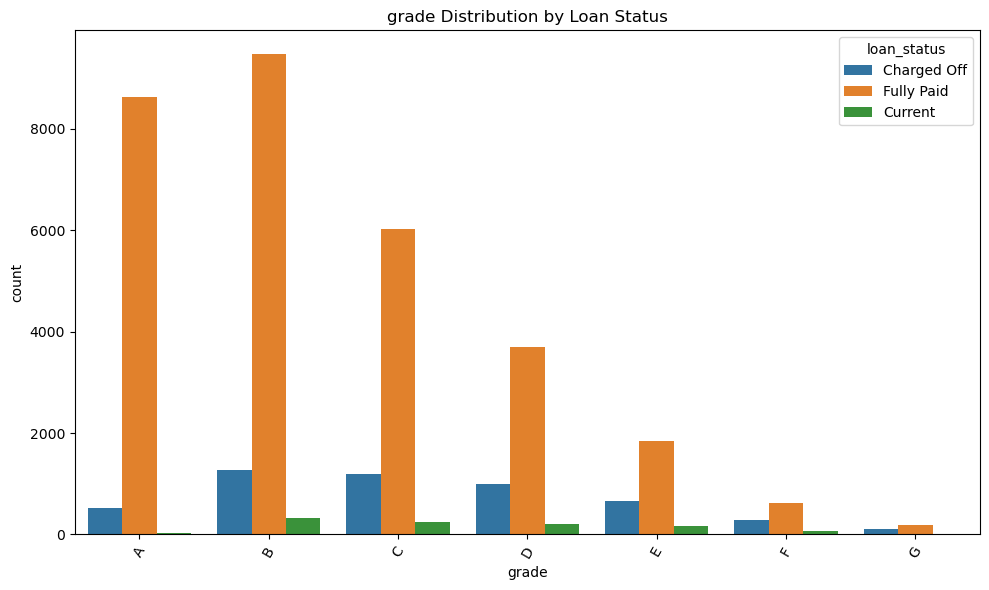

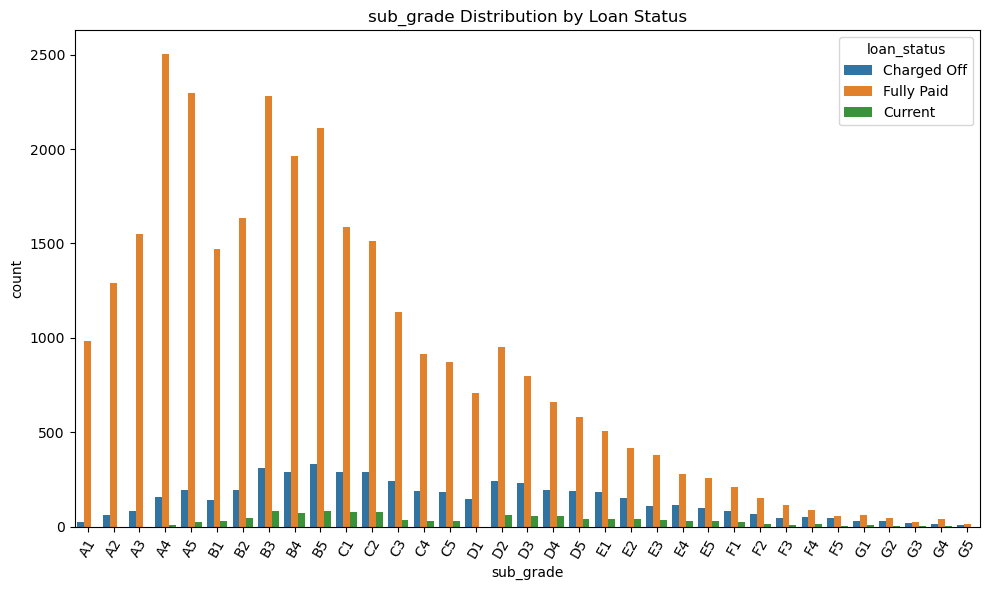

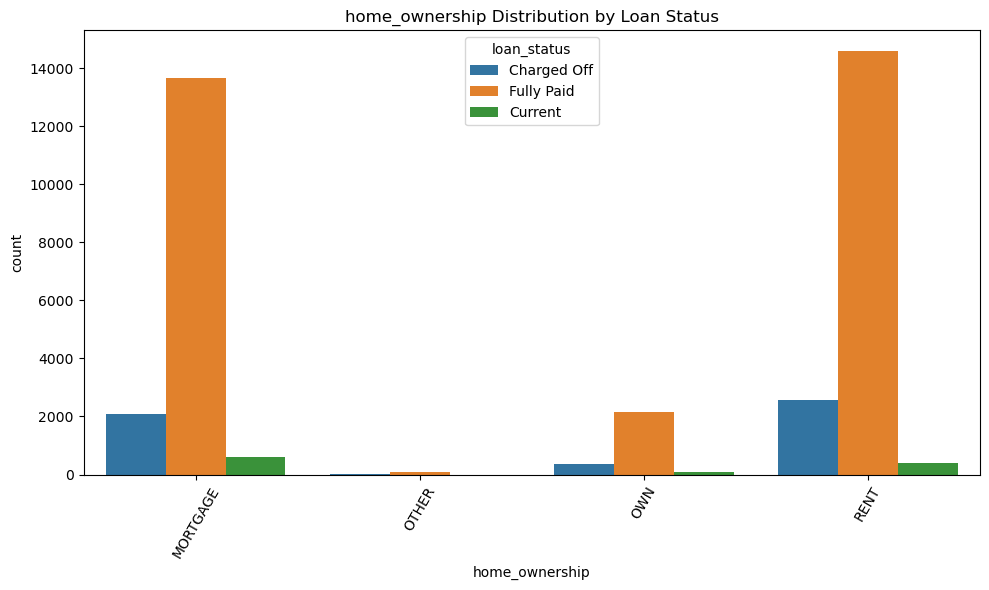

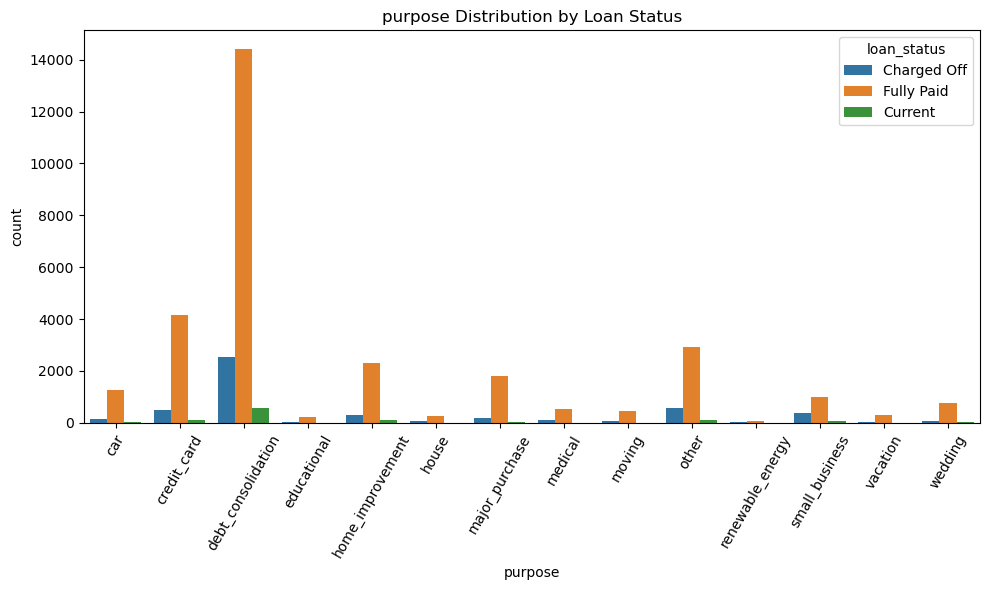

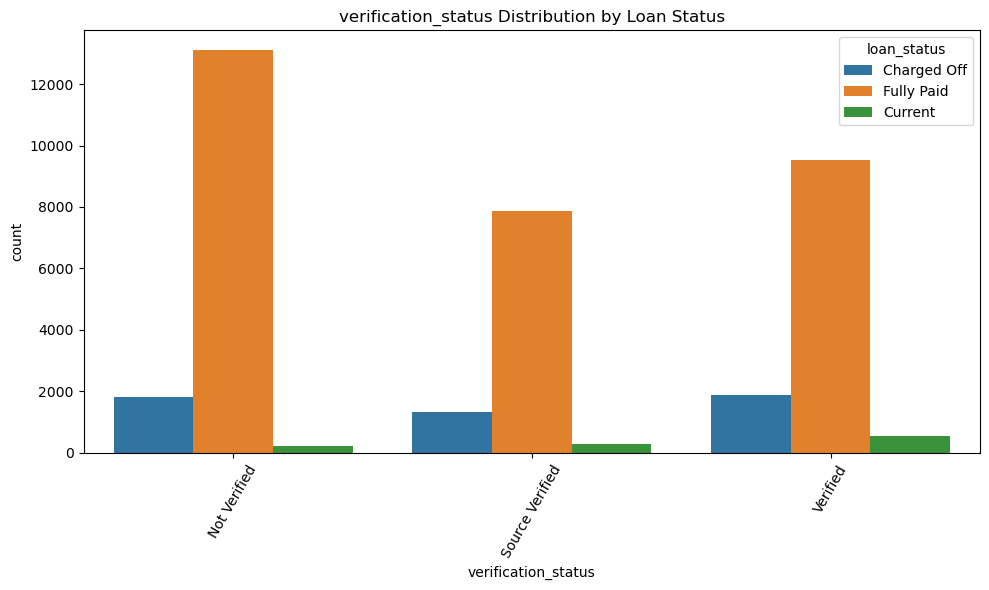

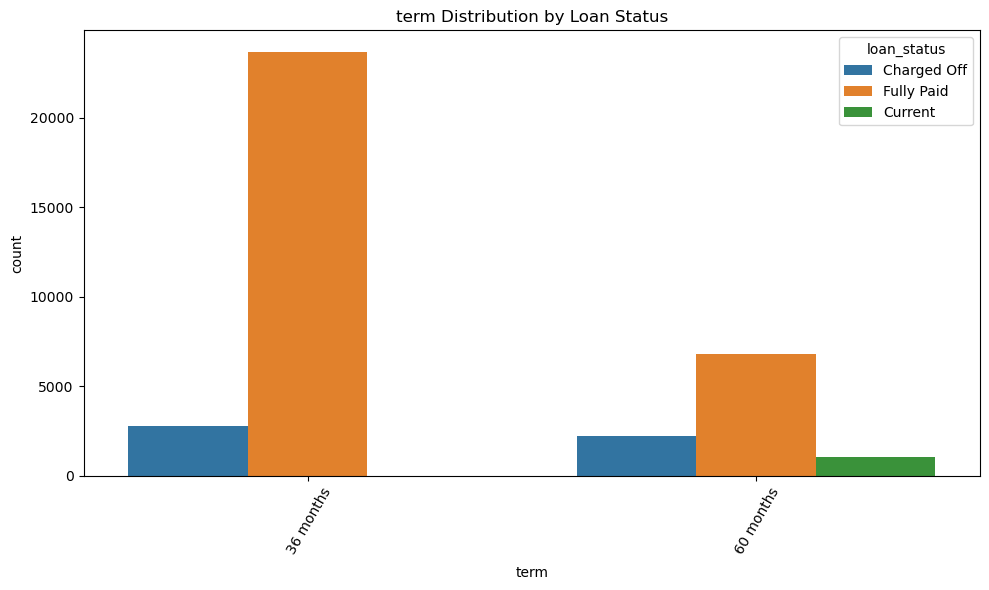

In [27]:
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='loan_status', data=loan_data,order=sorted(loan_data[feature]))
    plt.title(f'{feature} Distribution by Loan Status')
    plt.xticks(rotation=60)
    plt.tight_layout()
    plt.show()

In [28]:
# Insights extraction
print("\nInsights:")
print("1. Correlation Analysis:")
print(correlation_matrix['loan_status'].sort_values(ascending=False))


Insights:
1. Correlation Analysis:
loan_status                1.000000
recoveries                 0.343073
collection_recovery_fee    0.209431
int_rate                   0.198243
total_rec_late_fee         0.164064
revol_util                 0.095946
grade_num                  0.085874
inq_last_6mths             0.068836
loan_amnt                  0.049908
pub_rec                    0.049032
funded_amnt                0.047155
pub_rec_bankruptcies       0.044761
dti                        0.041651
id                         0.034860
member_id                  0.032940
funded_amnt_inv            0.032313
purpose_num                0.026163
installment                0.022334
verification_status_num    0.020453
delinq_2yrs                0.016083
revol_bal                  0.002949
open_acc                  -0.006726
total_rec_int             -0.008311
total_acc                 -0.020655
home_ownership_num        -0.026051
annual_inc                -0.040818
out_prncp_inv             -0

In [29]:
print("\nEDA Completed and cleaned data saved as 'cleaned_loan_data.csv'.")


EDA Completed and cleaned data saved as 'cleaned_loan_data.csv'.
